In [57]:
# Class to colorize, bold, or underline output
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
# 
import pandas as pd
import numpy as np

# Normalization: rescales the values into a range of [0,1]
data = np.array([[999999, 2, 0, 9], [35, 8, 4, 7], [27, 23, 1, 99]])
data_raw = pd.DataFrame({'Column1': data[:, 0], 'Column2': data[:, 1], 'Column3': data[:, 2], 'Column4': data[:, 3]})
print(color.BOLD + color.PURPLE + "\nData before normalization" + color.END)
print(data_raw)

from sklearn import preprocessing
# normalize the data attributes
normalized_data = preprocessing.normalize(data)
dataset = pd.DataFrame({'Column1': normalized_data[:, 0], 'Column2': normalized_data[:, 1], 'Column3': normalized_data[:, 2], 'Column4': normalized_data[:, 3]})
print(color.BOLD + color.PURPLE + "\nData after normalization" + color.END)
print(dataset)


Data before normalization
   Column1  Column2  Column3  Column4
0   999999        2        0        9
1       35        8        4        7
2       27       23        1       99

Data after normalization
    Column1   Column2   Column3   Column4
0  1.000000  0.000002  0.000000  0.000009
1  0.951171  0.217411  0.108705  0.190234
2  0.256736  0.218701  0.009509  0.941364


In [58]:
# Standardization: rescales data to have a mean of 0 and a standard deviation of 1 (unit variance)
from sklearn.preprocessing import StandardScaler
data = np.array([[999999, 2, 0, 999], [35, 1, 4, 7], [27, 3, 1, 99]])
data_raw = pd.DataFrame({'Column1': data[:, 0], 'Column2': data[:, 1], 'Column3': data[:, 2], 'Column4': data[:, 3]})
print(color.BOLD + color.PURPLE + "\nData before standardization" + color.END)
print(data_raw)
standardized_data = StandardScaler().fit_transform(data_raw)
dataset = pd.DataFrame({'Column1': standardized_data[:, 0], 'Column2': standardized_data[:, 1], 'Column3': standardized_data[:, 2], 'Column4': standardized_data[:, 3]})
print(color.BOLD + color.PURPLE + "\nData after standardization" + color.END)
print(dataset)


Data before standardization
   Column1  Column2  Column3  Column4
0   999999        2        0      999
1       35        1        4        7
2       27        3        1       99

Data after standardization
    Column1   Column2   Column3   Column4
0  1.414214  0.000000 -0.980581  1.409224
1 -0.707098 -1.224745  1.372813 -0.807399
2 -0.707115  1.224745 -0.392232 -0.601825


In [59]:
# Categorical Binning Example

data = pd.DataFrame({'Country':['Spain', 'Italy', 'Chile', 'Brazil', 'Canada', 'North Korea', 'Vietnam', 'Thailand', 'Malaysia', 'Mayanmar', 'Iceland', 'Germany', 'Cuba'], 
                     'Continent':['Europe', 'Europe', 'South America', 'South America', 'North America', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'North America', 'Europe',
                                  'Central America']})

conditions = [
    data['Country'].str.contains('Spain'),
    data['Country'].str.contains('Italy'),
    data['Country'].str.contains('Chile'),
    data['Country'].str.contains('Brazil'),
    data['Country'].str.contains('Canada'),
    data['Country'].str.contains('North Korea'),
    data['Country'].str.contains('Vietnam'),
    data['Country'].str.contains('Thailand'),
    data['Country'].str.contains('Malaysia'),
    data['Country'].str.contains('Mayanmar'),
    data['Country'].str.contains('Iceland'),
    data['Country'].str.contains('Germany'),
    data['Country'].str.contains('Cuba')]

choices = np.array(['Europe', 'Europe', 'South America', 'South America', 'North America', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'North America', 'Europe', 'South America'])
unique, counts = np.unique(choices, return_counts=True)
data['Continent'] = np.select(conditions, choices, default='Other')
print(color.BOLD + color.PURPLE + "\nCountries by continent" + color.END)
data


Countries by continent


,Country,Continent
0,Spain,Europe
1,Italy,Europe
2,Chile,South America
3,Brazil,South America
4,Canada,North America
5,North Korea,Asia
6,Vietnam,Asia
7,Thailand,Asia
8,Malaysia,Asia
9,Mayanmar,Asia


{'Asia': 5, 'Europe': 3, 'North America': 2, 'South America': 3}

Countries binned by continent


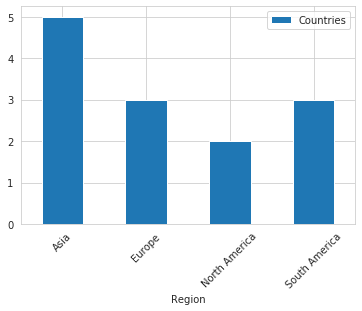

In [60]:
print(dict(zip(unique, counts)))

df = pd.DataFrame({'Region': unique.ravel(), 'Countries': counts.ravel()})
print(color.BOLD + color.PURPLE + "\nCountries binned by continent" + color.END)
ax = df.plot.bar(x='Region', y='Countries', rot=45)

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns

# Numerical Binning Example

revenue_df = pd.read_excel('https://github.com/vbloise3/WhizLabsML/blob/master/binning/201_Revenue_Total.xlsx?raw=true')
print(color.BOLD + color.PURPLE + "\nNumber of observations: " + str(len(revenue_df.index)) + color.END)
revenue_df


Number of observations: 1507


,reference number,name,price,date
0,740150,Thomas LLC,3380.91,2018-01-01 07:21:51
1,714466,Sillians-Krapfs,-63.16,2018-01-01 10:00:47
2,218895,Snodgrass Inc,2086.10,2018-01-01 13:24:58
3,307599,"Craut, Oniote and Johnson",863.05,2018-01-01 15:05:22
4,412290,Judais-Pewrters,499.26,2018-01-01 23:26:55
...,...,...,...,...
1502,424914,Green-Brown,1582.49,2018-11-27 14:29:02
1503,424914,Green-Brown,1049.28,2018-12-19 15:15:41
1504,424914,Green-Brown,2166.75,2018-12-29 13:03:54
1505,424914,Green-Brown,1915.00,2018-12-22 03:31:36


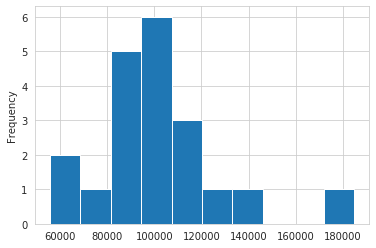

In [80]:
sns.set_style('whitegrid')
df = revenue_df.groupby(['reference number', 'name'])['price'].sum().reset_index()
df['price'].plot(kind='hist')

In [81]:
# Quantile binning example
print(color.BOLD + color.PURPLE + "\nqcut: a quantile-based discretization function that divides up the data into equal sized bins" + color.END)
print(df['price'].describe())

df['quantile_price_quartiles'] = pd.qcut(df['price'], q=4)
df['quantile_price_deciles'] = pd.qcut(df['price'], q=10, precision=0)
bin_labels_5 = ['Rookie', 'Sophomore', 'Junior', 'Senior', 'Professional']
df['quantile_price_quintiles'] = pd.qcut(df['price'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)
print(color.BOLD + color.PURPLE + "\nThree examples: quartiles, deciles, quintiles" + color.END)
df.head()


qcut: a quantile-based discretization function that divides up the data into equal sized bins
count        20.000000
mean     101711.287500
std       27037.449673
min       55733.050000
25%       89137.707500
50%      100271.535000
75%      110132.552500
max      184793.700000
Name: price, dtype: float64

Three examples: quartiles, deciles, quintiles


,reference number,name,price,quantile_price_quartiles,quantile_price_deciles,quantile_price_quintiles
0,141962,Speilmans LLC,63626.03,"(55733.049000000006, 89137.708]","(55732.0, 76471.0]",Rookie
1,146832,Jones-Spank,99608.77,"(89137.708, 100271.535]","(95908.0, 100272.0]",Junior
2,163416,Muns-Kalifan,77898.21,"(55733.049000000006, 89137.708]","(76471.0, 87168.0]",Rookie
3,218895,Snodgrass Inc,137351.96,"(110132.552, 184793.7]","(124778.0, 184794.0]",Professional
4,239344,Finley LLC,91535.92,"(89137.708, 100271.535]","(90686.0, 95908.0]",Sophomore


In [82]:
# Check the bin ranges
print(color.BOLD + color.PURPLE + "\nWhat ranges identify the bins?" + color.END)
results, bin_edges = pd.qcut(df['price'],
                            q=[0, .2, .4, .6, .8, 1],
                            labels=bin_labels_5,
                            retbins=True)

results_table = pd.DataFrame(zip(bin_edges, bin_labels_5),
                            columns=['Threshold', 'Tier'])
print(results_table)
print(color.BOLD + color.PURPLE + "\nBins are of unequal size ..." + color.END)


What ranges identify the bins?
    Threshold          Tier
0   55733.050        Rookie
1   87167.958     Sophomore
2   95908.156        Junior
3  103605.970        Senior
4  112290.054  Professional

Bins are of unequal size ...


In [83]:
# Check the bin distribution
print(color.BOLD + color.PURPLE + "\nBin distribution:" + color.END)
print(df['quantile_price_quintiles'].value_counts())
print(color.BOLD + color.PURPLE + "\n... but the data is evenly distributed across the bins" + color.END)


Bin distribution:
Professional    4
Senior          4
Junior          4
Sophomore       4
Rookie          4
Name: quantile_price_quintiles, dtype: int64

... but the data is evenly distributed across the bins


In [84]:
# Use cut to define the bin edges

# Remove the previous bins for simplicity
df = df.drop(columns = ['quantile_price_quartiles','quantile_price_deciles', 'quantile_price_quintiles'])

# Use cut to split the data into 4 equal bin sizes
pd.cut(df['price'], bins=4)
# How was the data distributed?
print(color.BOLD + color.PURPLE + "\nAfter using cut to create 4 bins:" + color.END)
print(pd.cut(df['price'], bins=4).value_counts())
print(color.BOLD + color.PURPLE + "\nBins are of equal size, but the data is unevenly distributed across the bins" + color.END)


After using cut to create 4 bins:
(87998.212, 120263.375]     12
(55603.989, 87998.212]       5
(120263.375, 152528.538]     2
(152528.538, 184793.7]       1
Name: price, dtype: int64

Bins are of equal size, but the data is unevenly distributed across the bins
